# <center>Projet économétrie des séries temporelles<center>

## Définition de l'environnement de travail

In [1]:
rm(list = ls())
setwd("C:/Users/PC/Documents/econometrics/")

## Installation des packages nécessaires aux projet

In [2]:
install.packages("tseries")
install.packages("readxl")
install.packages("xts")
install.packages("forecast", dependencies = TRUE)#pour la fonction auto.arima
library(forecast)
library("readxl")
library(tseries)
library(zoo)


  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-48 0.10-53              TRUE

  Binaries will be installed
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\Rtmp6TFo2k\downloaded_packages

  There is a binary version available but the source version is later:
       binary source needs_compilation
readxl  1.3.1  1.4.2              TRUE

  Binaries will be installed
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\Rtmp6TFo2k\downloaded_packages

  There is a binary version available but the source version is later:
    binary source needs_compilation
xts 0.12.1 0.12.2              TRUE

  Binaries will be installed
package 'xts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\Rtmp6TF

also installing the dependencies 'htmltools', 'bslib', 'tinytex', 'xfun', 'knitr', 'x13binary', 'rmarkdown', 'rticles', 'seasonal'




  There are binary versions available but the source versions are later:
            binary   source needs_compilation
htmltools  0.5.1.1    0.5.4              TRUE
bslib        0.2.4    0.4.2             FALSE
tinytex       0.31     0.44             FALSE
xfun          0.22     0.37              TRUE
knitr         1.33     1.42             FALSE
x13binary 1.1.39-3 1.1.57-3             FALSE
rmarkdown      2.8     2.20             FALSE
rticles       0.19     0.24             FALSE
seasonal     1.8.2    1.9.0             FALSE
forecast      8.14     8.20              TRUE

  Binaries will be installed
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\PC\anaconda3\envs\r-env\Lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll vers C:\Users\PC\anaconda3\envs\r-env\Lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'xfun' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\Rtmp6TFo2k\downloaded_packages


installing the source packages 'bslib', 'tinytex', 'knitr', 'x13binary', 'rmarkdown', 'rticles', 'seasonal'

Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'bslib' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'x13binary' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'seasonal' had non-zero exit status"Warning message in install.packages("forecast", dependencies = TRUE):
"installation of package 'rticles' had n

In [3]:
gov_reciept <- read_excel("reciept.xlsx")
summary(gov_reciept)
#View( gov_reciept) n'existe pas sur jupyter, mais peut être testé sur Rstudio

New names:
* `` -> ...1
* `Current receipts` -> `Current receipts...4`
* `From persons` -> `From persons...11`
* `From persons` -> `From persons...20`
* `Current expenditures` -> `Current expenditures...23`
* ... and 2 more problems


      ...1            Année       trimestre         Current receipts...4
 Min.   :  0.00   Min.   :1947   Length:304         Min.   :  52.3      
 1st Qu.: 75.75   1st Qu.:1966   Class :character   1st Qu.: 189.3      
 Median :151.50   Median :1984   Mode  :character   Median :1147.7      
 Mean   :151.50   Mean   :1984                      Mean   :1917.2      
 3rd Qu.:227.25   3rd Qu.:2003                      3rd Qu.:3189.6      
 Max.   :303.00   Max.   :2022                      Max.   :7618.1      
                                                    NA's   :1           
 Current tax receipts Personal current taxes Taxes on production and imports
 Min.   :  46.7       Min.   :  15.80        Min.   :  17.7                 
 1st Qu.: 153.7       1st Qu.:  60.73        1st Qu.:  61.7                 
 Median : 766.9       Median : 392.20        Median : 299.2                 
 Mean   :1319.1       Mean   : 695.89        Mean   : 491.3                 
 3rd Qu.:2195.1       3rd Qu.:1

In [4]:
dim(gov_reciept)

[1] 304  47

### Présentation du jeu de donnée

In [5]:
gov_reciept

...1,Année,trimestre,Current receipts...4,Current tax receipts,Personal current taxes,Taxes on production and imports,Taxes on corporate income,Taxes from the rest of the world,Contributions for government social insurance,...,Total receipts,Current receipts...39,Capital transfer receipts,Total expenditures,Current expenditures...42,Gross government investment,Capital transfer payments,Net purchases of nonproducted assets,Less: Consumption of fixed capital,Net lending or net borrowing
0,1947,Q1,55.4,48.3,19.2,17.7,11.5,NA,6.3,...,56.4,55.4,1.0,NA,52.8,4.9,0,NA,11.8,NA
1,1947,Q2,54.8,48.1,19.5,17.7,10.9,NA,6.0,...,55.7,54.8,0.9,NA,52.4,5.1,0,NA,11.4,NA
2,1947,Q3,54.4,48.5,19.7,18.0,10.7,NA,5.2,...,55.4,54.4,1.0,NA,54.7,6.1,0,NA,11.3,NA
3,1947,Q4,57.0,51.4,20.8,19.0,11.7,NA,4.8,...,58.0,57.0,1.0,NA,51.5,6.6,0,NA,11.1,NA
4,1948,Q1,57.9,52.2,21.2,19.0,12.0,NA,4.8,...,59.0,57.9,1.1,NA,53.1,7.5,0,NA,10.7,NA
5,1948,Q2,56.7,51.3,18.9,19.7,12.6,NA,4.6,...,57.9,56.7,1.2,NA,54.1,8.2,0,NA,10.5,NA
6,1948,Q3,56.2,50.7,18.2,20.0,12.4,NA,4.6,...,57.2,56.2,1.0,NA,57.3,8.8,0,NA,10.5,NA
7,1948,Q4,56.2,50.7,18.4,20.3,12.0,NA,4.5,...,57.1,56.2,1.0,NA,58.4,9.4,0,NA,10.3,NA
8,1949,Q1,55.2,49.0,17.8,20.4,10.8,NA,5.2,...,56.2,55.2,0.9,NA,60.6,10.3,0,NA,10.2,NA
9,1949,Q2,53.5,47.3,17.0,20.8,9.5,NA,5.1,...,54.4,53.5,0.9,NA,62.1,11.3,0,NA,9.8,NA


On constate que le dataset contient plusieurs informations relatifs au gouvernement, dans le cadre de ce projet, nous analyserons uniquement les données relatives aux investissementsd bruts du gouvernement

In [6]:
serie <- ts(data=gov_reciept[,2])
summary(serie)

     Année     
 Min.   :1947  
 1st Qu.:1966  
 Median :1984  
 Mean   :1984  
 3rd Qu.:2003  
 Max.   :2022  

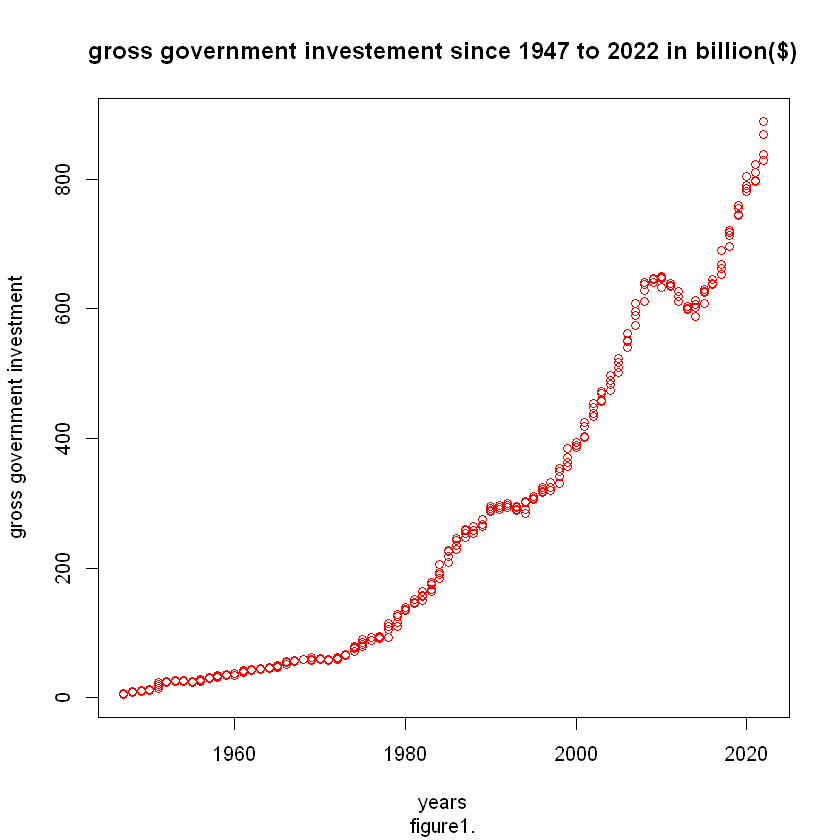

In [7]:
##graphique de base
gross_gov <- gov_reciept$`Gross government investment`
plot(serie, gross_gov, col="red", main="gross government investement since 1947 to 2022 in billion($)", ylab="gross government investment", xlab="years", sub="figure1.")

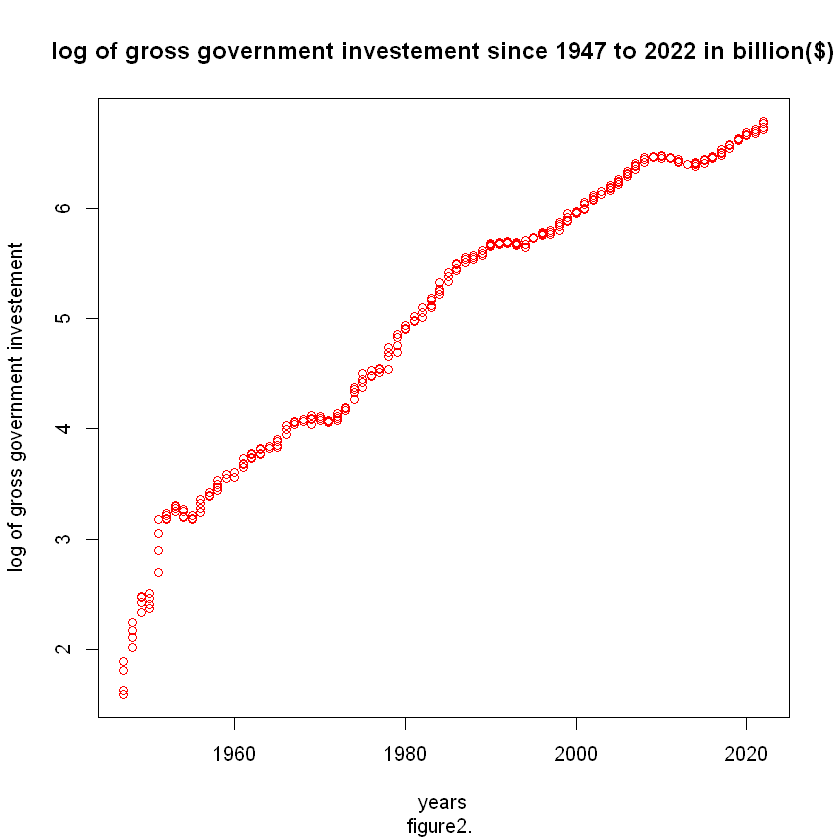

In [8]:
##graphique avec log
plot(serie, log(gross_gov), col="red", main="log of gross government investement since 1947 to 2022 in billion($)", sub="figure2. ", xlab="years", ylab="log of gross government investement")

On constate d'après la figure 2, qu'avec le log, la série se lisse légèrement. On prendra alors, la différence première

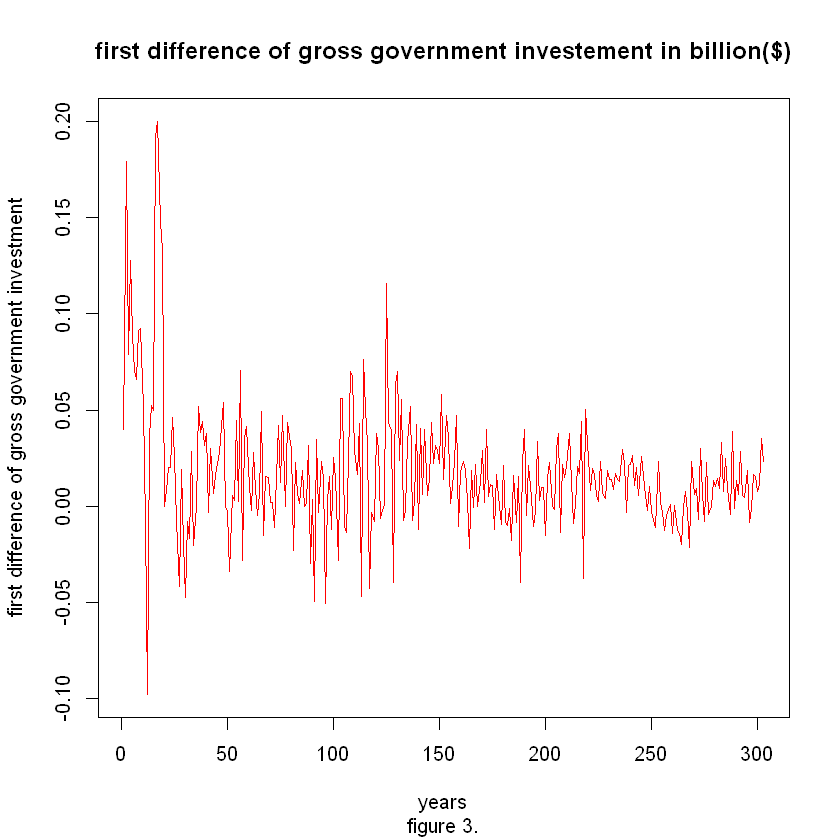

In [101]:
diff_premiere = diff(log(gross_gov), differences=1)

plot(diff_premiere, type="l", col="red", main="first difference of gross government investement in billion($)", sub="figure 3.",xlab="years", ylab="first difference of gross government investment")

D'après la figure3, on constate que la série semble être stationnaire, on va donc devoir tester l'hypothèse de stationnarité à l'aide du test de Dickey-Füler.

## Test de Dickey-füler

In [102]:
##test fuuler

adf.test(diff_premiere, alternative="stationary") #test de statinnarité rejeté car p-value=0.01< 5%, donc l'hypothèse de stationnarité

Warning message in adf.test(diff_premiere, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff_premiere
Dickey-Fuller = -5.9545, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Le test de Dickey-füler nous permet de voir que l'hypothèse alternative(la série est stationnaire) est vérifié car on obtient une p-value(0.01) < 5%. L'hypothèse de stationarité est donc vérifié. 

### ACF / PACF

Nous allons maintenant étudier l'ACF et le PACF, pour estimer un modèle 

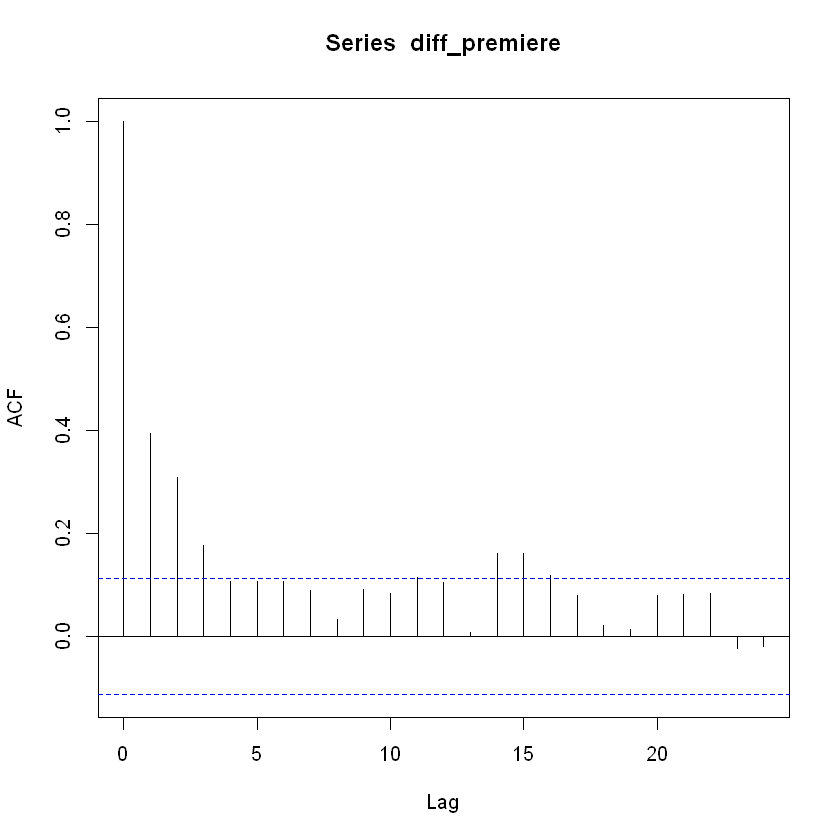

In [11]:
acf(diff_premiere)

On constate sur l'ACF, un possible effet de saisonalité, ce qui peut nous laisser indifférent car il peut s'agir d'un auto-regressif(AR), car on constate une décroissance des lag. cependant, l'effet de saisonalité ne nous permet pas d'observer correctement, on supposera donc qu'il s'agit d'un AR, mais cela n'est pas encore sûr tant que la saisonalité ne sera pas enlevé.

## Autocorrélogramme partiel de la différence première

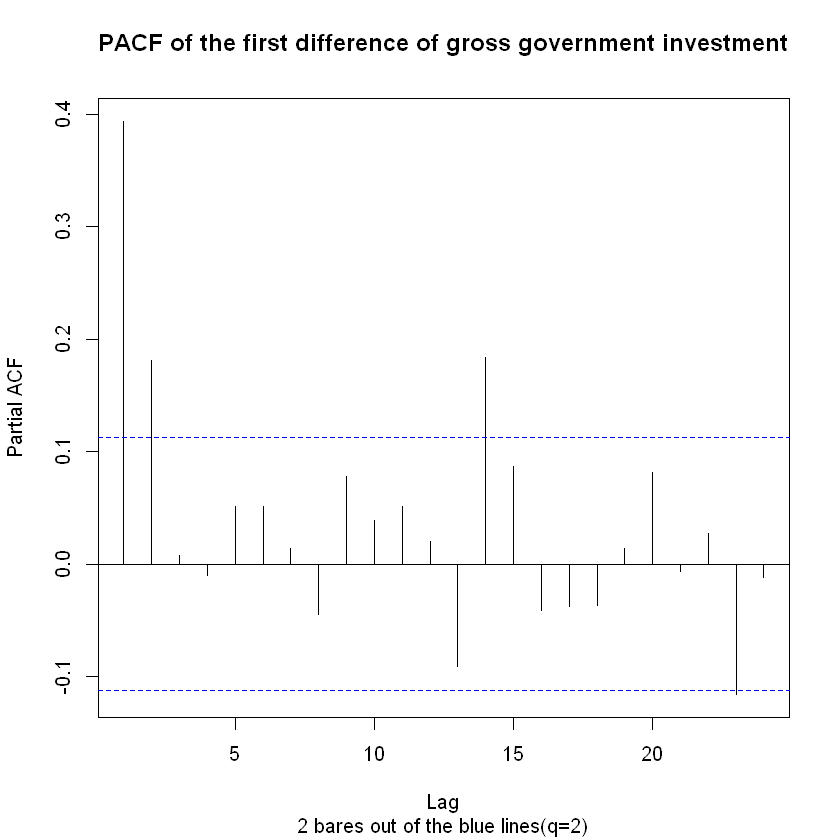

In [132]:
pacf(diff_premiere, main="PACF of the first difference of gross government investment", sub="2 bares out of the blue lines(q=2)")

On constate sur l'ACF, un effet sinusoïdale, ce qui nous permet de dire qu'il ne s'agit pas d'un modèle AR pûr. On a donc un modèle à moyenne mobile.

### Conjecture du modèle ARIMA

On a donc un modèle ARIMA, on regardant le PACF, on peut déterminer le paramètre p de la partie auto-régressive. On voit que c'est significatif à 2. on peut donc penser qu'on a un AR(1) ou un AR(2).

Pour la partie moyenne mobile, on regarde l'ACF, et on constate que c'est significatif entre 3 et 4. On aurait donc un MA(3) ou un MA(4). 

L'objectif sera donc de tester pour qu'elle paramètre p et q, le modèle maximise le critère d'information et sa significativité.

### Estimation du meilleur modèle ARIMA

In [134]:
model1 <- auto.arima(diff_premiere, max.d=1, max.p =1, max.q=3)

In [136]:
model1

Series: diff_premiere 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1     ma2      ma3
      0.2183  -0.9208  0.1484  -0.1522
s.e.  0.2490   0.2442  0.1837   0.0747

sigma^2 estimated as 0.0009039:  log likelihood=631.09
AIC=-1252.19   AICc=-1251.98   BIC=-1233.63

In [140]:
model2 <- auto.arima(diff_premiere, max.d=2, max.p =1, max.q=4)

In [142]:
model2

Series: diff_premiere 
ARIMA(1,1,4) 

Coefficients:
          ar1      ma1      ma2      ma3      ma4
      -0.2800  -0.4198  -0.2044  -0.1375  -0.1144
s.e.   0.7016   0.6965   0.5009   0.0625   0.1342

sigma^2 estimated as 0.0009055:  log likelihood=631.33
AIC=-1250.65   AICc=-1250.37   BIC=-1228.39

In [116]:
install.packages("seastests")
library("seastests")


  There is a binary version available but the source version is later:
          binary source needs_compilation
seastests 0.14.2 0.15.4             FALSE



installing the source package 'seastests'



In [118]:
df_diff_prem <- data.frame(serie, gross_gov)

In [130]:
head(df_diff_prem)

Année,gross_gov
1947,4.9
1947,5.1
1947,6.1
1947,6.6
1948,7.5
1948,8.2


In [124]:
gross_gov_series_diff_prem<-ts(df_diff_prem$gross_gov,start=c(1947), end=c(2022), frequency=4)

In [125]:
gross_gov_series_diff_prem

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argument formel "cols" correspondant à plusieurs arguments fournis

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6.

,Qtr1,Qtr2,Qtr3,Qtr4
1947,4.9,5.1,6.1,6.6
1948,7.5,8.2,8.8,9.4
1949,10.3,11.3,11.9,11.8
1950,10.7,11.1,11.7,12.3
1951,14.9,18.2,21.1,24.1
1952,24.1,24.3,24.8,25.3
1953,26.5,27.2,27.0,25.9
1954,26.4,25.9,24.7,24.5
1955,24.1,24.8,24.3,24.3
1956,25.6,26.6,27.8,28.7


In [128]:
test_welch <- welch(gross_gov_series_diff_prem, diff=1)

In [129]:
test_welch

Test used:  Kruskall Wallis 
 
Test statistic:  0.73 
P-value:  0.533586

D'après l'autocorrélogramme partiel, on constate une tendance sinusoïdale, toujours un effet de saisonalité présent, on peut donc penser qu'on a un modèle ARIMA, avec une partie autorégressif AR(2), et une partie moyenne mobile MA(3). Ceci sera à tester par la suite afin d'estimer le meilleur modèle maximisant le critère d'informatione et sa p-value

### Suppression de la saisonalité

Reprenons notre série telle qu'elle était avant la différence première, nous allons à partir de ces données créer un dataframe unique

In [42]:
serie <- ts(data=gov_reciept[,2])
gross_gov <- gov_reciept$`Gross government investment`

In [40]:
dim(serie) #304 dates au total

[1] 304   1

In [19]:
df_season_gov <- data.frame(serie, gross_gov)

In [21]:
head(df_season_gov)

Année,gross_gov
1947,4.9
1947,5.1
1947,6.1
1947,6.6
1948,7.5
1948,8.2


In [23]:
summary(df_season_gov)

     Année        gross_gov    
 Min.   :1947   Min.   :  4.9  
 1st Qu.:1966   1st Qu.: 51.3  
 Median :1984   Median :206.8  
 Mean   :1984   Mean   :274.2  
 3rd Qu.:2003   3rd Qu.:472.9  
 Max.   :2022   Max.   :889.3  

In [44]:
dim(df_season_gov)

[1] 304   2

In [54]:
gross_gov_series<-ts(df_season_gov$gross_gov,start=c(1947), end=c(2022), frequency=4)

In [56]:
decompose_df_season <- decompose(gross_gov_series)

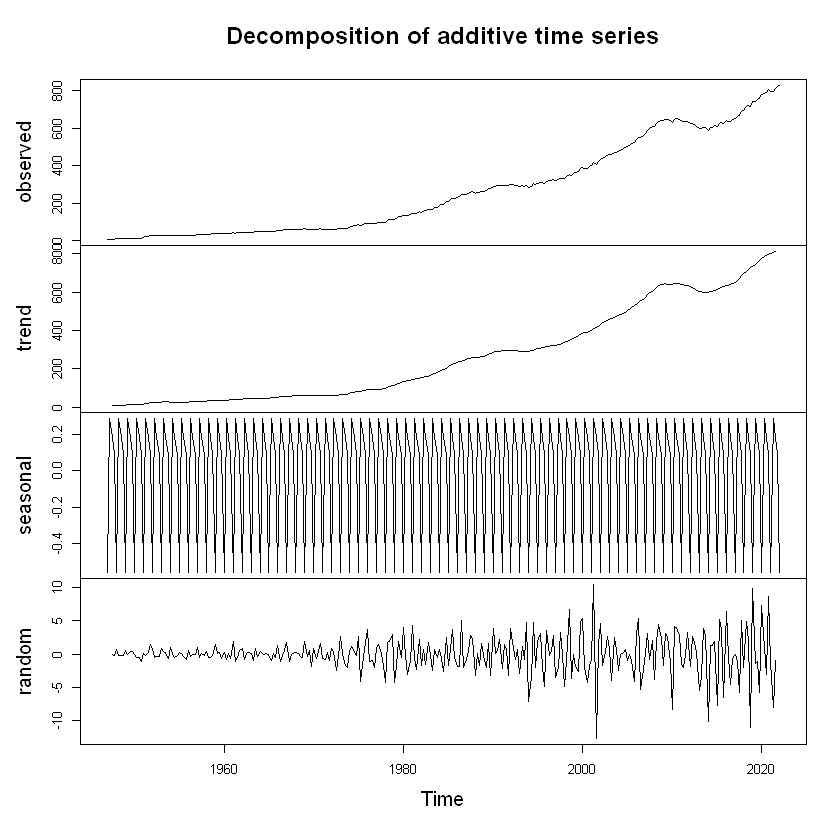

In [58]:
plot(decompose_df_season)

In [60]:
print(decompose_df_season)

$x
      Qtr1  Qtr2  Qtr3  Qtr4
1947   4.9   5.1   6.1   6.6
1948   7.5   8.2   8.8   9.4
1949  10.3  11.3  11.9  11.8
1950  10.7  11.1  11.7  12.3
1951  14.9  18.2  21.1  24.1
1952  24.1  24.3  24.8  25.3
1953  26.5  27.2  27.0  25.9
1954  26.4  25.9  24.7  24.5
1955  24.1  24.8  24.3  24.3
1956  25.6  26.6  27.8  28.7
1957  29.8  29.7  30.6  30.8
1958  31.3  32.0  32.9  34.3
1959  36.2  36.2  36.1  34.9
1960  35.1  35.2  36.8  36.9
1961  39.6  38.5  39.9  41.6
1962  42.0  41.9  43.1  43.5
1963  43.3  43.6  45.8  45.1
1964  45.8  46.5  46.6  46.7
1965  46.2  46.9  48.9  49.5
1966  51.9  51.9  54.2  56.2
1967  57.9  56.6  57.9  58.3
1968  58.4  59.5  59.5  59.6
1969  61.5  59.7  59.9  57.0
1970  59.0  58.8  60.2  61.1
1971  58.1  58.3  59.2  58.5
1972  60.0  60.9  59.2  62.6
1973  66.2  65.5  64.6  66.2
1974  71.0  76.0  78.2  79.5
1975  83.0  79.2  85.5  89.9
1976  92.9  89.0  88.7  88.0
1977  91.4  94.2  93.6  93.4
1978  93.5 105.0 109.7 114.1
1979 109.7 116.9 125.4 128.4
1980 135.7 

Ensuite, nous utiliserons la libraririe forecast pour avoir nos données sans effet saisonier

In [64]:
deseason_gross_gov <- seasadj(decompose_df_season)

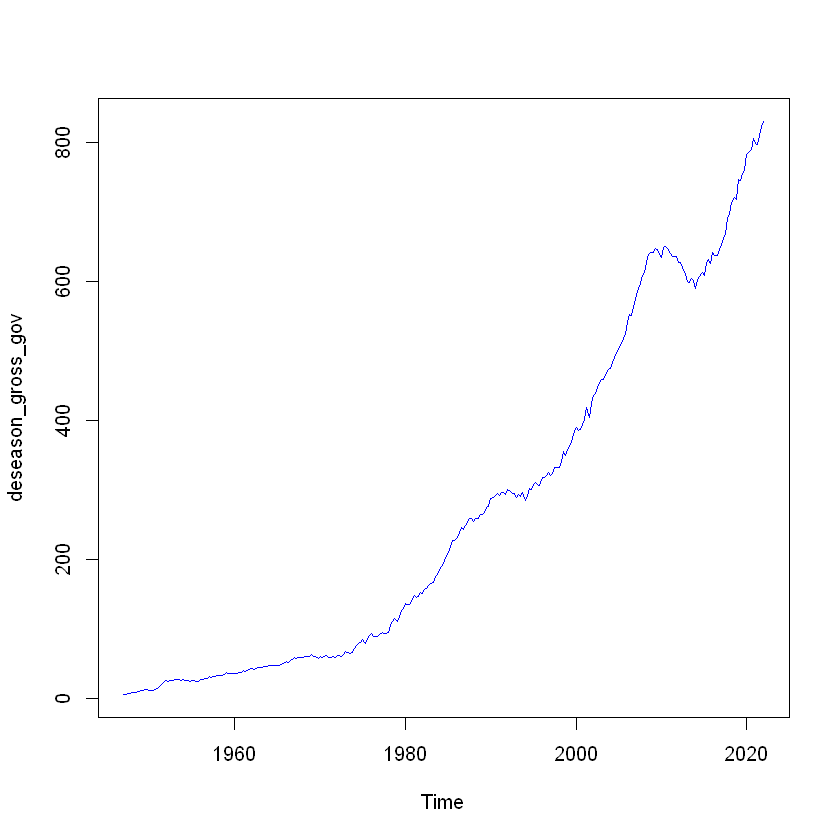

In [84]:
plot(deseason_gross_gov, col="blue")

La série semble explosive, il va falloir la stationnariser en prenant la différence première

In [87]:
diff_prem_deseason <- diff(log(deseason_gross_gov), differences=1)

In [89]:
diff_prem_deseason

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argument formel "cols" correspondant à plusieurs arguments fournis

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6.

,Qtr1,Qtr2,Qtr3,Qtr4
1947,,-1.253389e-01,2.065430e-01,9.586681e-02
1948,2.126264e-01,-1.787673e-02,8.525875e-02,7.760298e-02
1949,1.533136e-01,1.438231e-02,6.198622e-02,-3.939178e-04
1950,-3.979144e-02,-4.012759e-02,6.309727e-02,5.862340e-02
1951,2.355012e-01,1.475435e-01,1.550461e-01,1.380038e-01
1952,2.642795e-02,-2.641388e-02,2.485283e-02,2.389750e-02
1953,7.055182e-02,-5.289546e-03,-3.563052e-03,-3.818071e-02
1954,4.333043e-02,-5.109545e-02,-4.372140e-02,-4.276057e-03
1955,9.907518e-03,-5.805924e-03,-1.627489e-02,3.947199e-03
1956,7.719179e-02,5.994503e-03,4.837785e-02,3.540738e-02


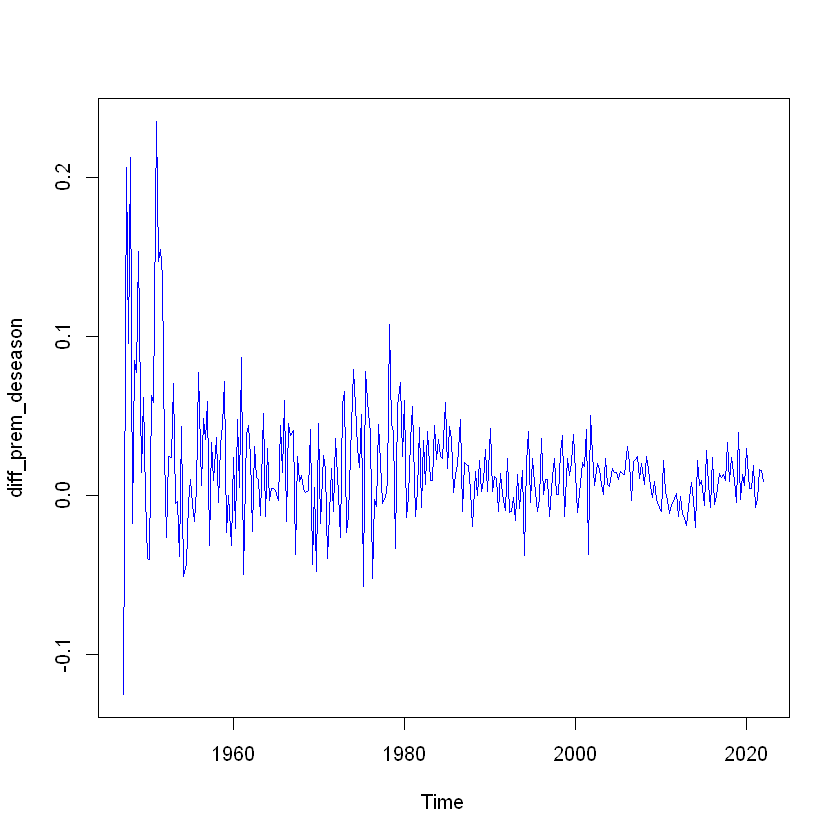

In [91]:
plot(diff_prem_deseason, col="blue")

In [93]:
##test fuuler

adf.test(diff_prem_deseason, alternative="stationary") #test de statinnarité rejeté car p-value=0.01< 5%, donc l'hypothèse de stationnarité

Warning message in adf.test(diff_prem_deseason, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff_prem_deseason
Dickey-Fuller = -6.5356, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


La série est donc stationnaire, le test de dickey-füler est validé

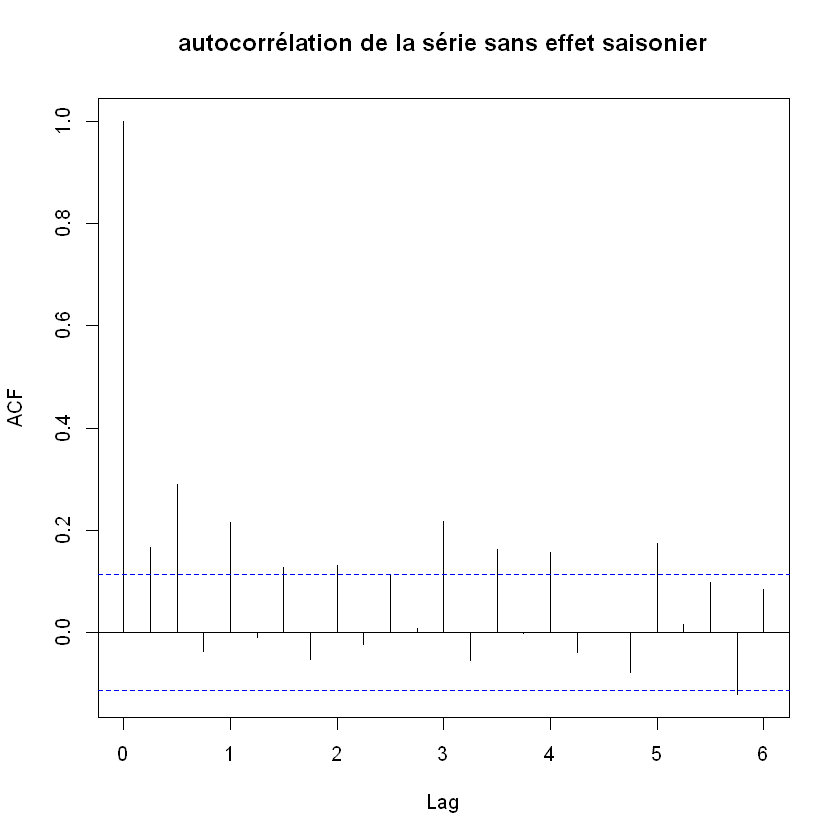

In [96]:
acf(diff_prem_deseason,  main="autocorrélation de la série sans effet saisonier")

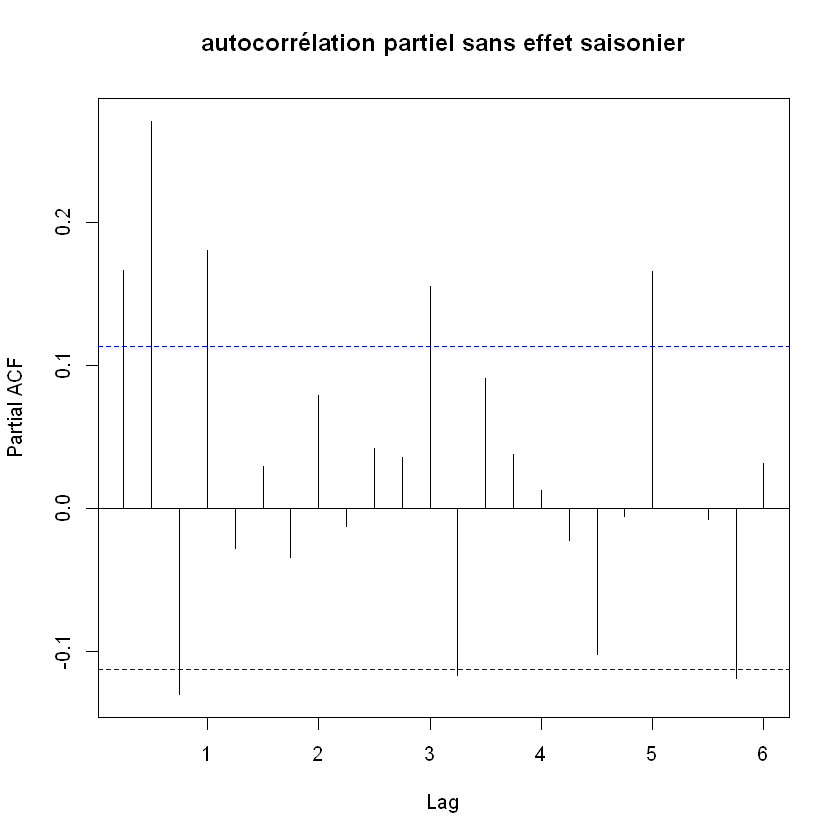

In [97]:
pacf(diff_prem_deseason, main="autocorrélation partiel sans effet saisonier")

On constate contrairement à tout à l'heure, une décroissance linéaire, on peut donc penser qu'il s'agit d'un auto-regressif AR. Regardons le PACF pour déterminer l'ordre

Dans l'auto-corrélation partiel, on retrouve encore un léger effet saisonier, mais moins persistant. De plus, les lag ne sont pas significatif à un certain ordre, on peut donc penser à un modèle à moyenne mobile MA.

### Test d'un modèle ARIMA

In [82]:
best_model <- auto.arima(diff_premiere, max.d=1, max.p =1, max.q=1)

In [83]:
best_model

Series: diff_premiere 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.8166
s.e.   0.0590

sigma^2 estimated as 0.0009511:  log likelihood=622.08
AIC=-1240.16   AICc=-1240.12   BIC=-1232.74

### Comparaison au modèle arima automatique sous R

In [74]:
model <- auto.arima(diff_premiere)

In [98]:
model

Series: diff_premiere 
ARIMA(1,1,4) 

Coefficients:
          ar1      ma1      ma2      ma3      ma4
      -0.2800  -0.4198  -0.2044  -0.1375  -0.1144
s.e.   0.7016   0.6965   0.5009   0.0625   0.1342

sigma^2 estimated as 0.0009055:  log likelihood=631.33
AIC=-1250.65   AICc=-1250.37   BIC=-1228.39

In [ ]:
plot(Y,type="l",main="S?rie Non Stationnaire Marche au hasard (Random Walk)")
#accumulation des choques au cours du temps, on n'oscille pas autour de la moyenne
T<-1:n
plot(Z,type="l",main="Tendance D?terministe pure",col="red")
abline(reg=lm(Z~T),col="green")
#droite de regression de Z en fonction du temps. Z_t=alpha + B?ta_t
summary(lm(Z~T))
plot(residuals(lm(Z~T)),type="l",main = "Residus de la r?gression d?terministe")
#On trace les r?sidus Epsilon_ute=Z_t - alpha_ute - b?ta_ute_t
#Pour stationnariser un processus Ts
#On fait la regression par rapport au temps
#On prend les r?sidus, pour purger la variable de sa tendance
# Epsilon chapeau = Z_t - intercept chapeau - Beta_t chapeau

abline(h=c(-1.96,1.96), col="red")
abline(h=0)
#
plot(W,type="l",main="Processus TS+DS")
summary(lm(W~T))
plot(residuals(lm(W~T)),type="l",main = "Residus de la r?gression")
# TS +DS : retirer la tendance ne suffit pas pour stationnariser
#Pour stationnariser, on prend les r?sidus et on fait la diff?rence premi?re
#Diff?rence premi?re : Epsilon_tchapeau - Epsilon_t-1chapeau
#Sous R, commande diff